In [1]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

## Files

- **data.a_zip** A renamed .zip archive, created to sidestep constraints on filenames and nested archives. This unzips to create the data folder discussed below.

- **data/data.parquet** The train set metadata, which includes a limited to a handful of examples. You are encouraged to source additional codebases for training your models. Most of the metadata provided here is only available for the train set.

+ **instance_id** - A unique string identifier for the instance (aka GitHub issue).
+ **repo** - The relevant GitHub repository. Also served by the evaluation API.
+ **problem_statement** - Text describing the issue. Also served by the evaluation API.
+ **patch** - Only provided for the train set. The patch resolving the issue.
+ **test_patch** - Only provided for the train set. The patch resolving the issue.
+ **pull_number** - The PR number of the pull request resolving the issue.
+ **base_commit** - The commit used as the basis for the provided copy of the repo.
+ **issue_numbers** - The original ID number of the issue.
+ **[PASS_TO_PASS/FAIL_TO_PASS]** - Lists of the unit tests to run for this issue.

- **data/*/** All other subdirectories in the data are used by the evaluation API and to configure the evaluation environments. All of the evaluation environments run Python 3.11 and will install it if necessary, but only on Ubuntu 20 or 22.

- **kprize_setup/** Files used for installing this competition's adaptation of the swebench library. Note that this won't currently work on Windows.

- **kaggle_evaluation/** Files that implement the evaluation API. Some of the implementation details may be of interest for offline testing but we recommend beginning with the demo submission notebook. You are strongly encouraged to run the API in a Docker container based on Kaggle's image when running locally to avoid issues with your existing Python environment. If necessary the API will install uv plus several libraries (listed in kprize_setup/pip_packages), and create new Python environments.

In [2]:
working_pth = "konwinski-prize"
repo_pth = "konwinski-prize/data/repos"

In [3]:
df = pd.read_parquet(os.path.join(working_pth,"data/data.parquet"))
df

,instance_id,repo,problem_statement,patch,test_patch,pull_number,base_commit,PASS_TO_PASS,FAIL_TO_PASS,issue_numbers
0,pylint-dev__astroid-2496,pylint-dev/astroid,TypeError: unsupported format string passed to...,diff --git a/ChangeLog b/ChangeLog\nindex 4560...,diff --git a/tests/test_inference.py b/tests/t...,2496,8d3cdbbe6685fd8cf211816bec56c90f38f1859e,[tests/test_inference.py::InferenceUtilsTest::...,[tests/test_inference.py::test_formatted_fstri...,[2492]
1,pylint-dev__astroid-2468,pylint-dev/astroid,Pylint checks against incorrect type with prop...,diff --git a/ChangeLog b/ChangeLog\nindex fdbb...,diff --git a/tests/test_inference.py b/tests/t...,2468,6db3a60553ff538a936d5dda23d67a3924a57f45,[tests/test_inference.py::InferenceUtilsTest::...,[tests/test_inference.py::InferenceTest::test_...,[2467]
2,astropy__astropy-17048,astropy/astropy,QTable cannot take `dimensionless_unscaled` wh...,diff --git a/astropy/table/table.py b/astropy/...,diff --git a/astropy/table/tests/test_table.py...,17048,d60f6b72cd525262bfd179331d9fe4474177918f,[astropy/table/tests/test_table.py::TestSetTab...,[astropy/table/tests/test_table.py::test_qtabl...,[17047]
3,astropy__astropy-16898,astropy/astropy,BUG: tables do not deal well with zero-sized s...,diff --git a/astropy/io/registry/core.py b/ast...,diff --git a/astropy/io/fits/tests/test_connec...,16898,ee6d087baf301c1d08db92e6e5b6d909d57e6fac,[astropy/io/fits/tests/test_connect.py::TestSi...,[astropy/io/fits/tests/test_connect.py::test_z...,[16897]
4,astropy__astropy-16830,astropy/astropy,KeyError: 'version_1_3_or_later' when parsing ...,diff --git a/astropy/io/votable/tree.py b/astr...,diff --git a/astropy/io/votable/tests/test_tre...,16830,e39f486fec48d87aa3677326167954370d7a7bf9,[astropy/io/votable/tests/test_tree.py::test_c...,[astropy/io/votable/tests/test_tree.py::test_v...,"[16825, 16826]"
5,astropy__astropy-16812,astropy/astropy,Provide a way to make a copy of a model with d...,diff --git a/astropy/modeling/core.py b/astrop...,diff --git a/astropy/modeling/tests/test_core....,16812,c241103c11954d3c1cfe3c1840b1ece72479c522,[astropy/modeling/tests/test_core.py::test_Mod...,[astropy/modeling/tests/test_core.py::test_res...,[16593]


In [54]:
# Select a specific sample
idx = 2
row_dict = df.iloc[idx].to_dict()  # Convert first row to dictionary
# print(row_dict)
print(row_dict.keys())

dict_keys(['instance_id', 'repo', 'problem_statement', 'patch', 'test_patch', 'pull_number', 'base_commit', 'PASS_TO_PASS', 'FAIL_TO_PASS', 'issue_numbers'])


In [55]:
repo_instance_path = os.path.join(repo_pth, "repo__" + row_dict['instance_id'])
os.listdir(repo_instance_path)

['.gitignore',
 'SECURITY.md',
 '.pre-commit-config.yaml',
 'examples',
 '.pyinstaller',
 'conftest.py',
 '.mailmap',
 '.readthedocs.yaml',
 '.github',
 '.ruff.toml',
 'licenses',
 '.git-blame-ignore-revs',
 'docs',
 'pyproject.toml',
 'CONTRIBUTING.md',
 'CITATION.cff',
 'README.rst',
 'asv.ci.conf.json',
 'setup.py',
 'CITATION',
 '.circleci',
 '.astropy-root',
 'GOVERNANCE.md',
 'CODE_OF_CONDUCT.md',
 '.pycodestyle',
 'CHANGES.rst',
 'cextern',
 'LICENSE.rst',
 'astropy',
 'MANIFEST.in',
 '.flake8',
 '.devcontainer',
 'codecov.yml',
 'tox.ini',
 '.gitattributes']

In [56]:
print(row_dict['instance_id'])

astropy__astropy-17048


In [57]:
print(row_dict['repo'])

astropy/astropy


In [58]:
print(row_dict['problem_statement'])

QTable cannot take `dimensionless_unscaled` when creating table from `data`
### Description

Attempting to create an table with a column in units `dimensionless_unscaled` leads to a crash, because a guard against setting a column attribute to `np.ma.masked` or `None` triggers a comparison between `np.ma.masked` and Unit which eventually resolves to a `ZeroDivisionError`.

### Expected behavior

A `QTable` is created. 

### How to Reproduce

```python
from astropy.table import QTable, Column
import numpy as np
data = np.ones((5,2))
tt = QTable(data=data, names=["a","weight"],units={"weight":u.dimensionless_unscaled})
```
Results in 
```
---------------------------------------------------------------------------
ZeroDivisionError                         Traceback (most recent call last)
Cell In[15], line 2
      1 data = np.ones((5,2))
----> 2 tt = QTable(data=data, names=["a","weight"],units={"weight":u.dimensionless_unscaled})
      3 tt

File ~/miniconda3/envs/datapipe-testbench/lib/p

In [59]:
print(row_dict['patch'])

diff --git a/astropy/table/table.py b/astropy/table/table.py
index 75e179fca66..0c1382f5ce2 100644
--- a/astropy/table/table.py
+++ b/astropy/table/table.py
@@ -938,7 +938,7 @@ def _set_column_attribute(self, attr, values):
                 if value.strip() == "":
                     value = None
 
-            if value not in (np.ma.masked, None):
+            if value is not None and value is not np.ma.masked:
                 col = self[name]
                 if attr == "unit" and isinstance(col, Quantity):
                     # Update the Quantity unit in-place
diff --git a/astropy/units/core.py b/astropy/units/core.py
index 4d72912003c..7bb637e81f5 100644
--- a/astropy/units/core.py
+++ b/astropy/units/core.py
@@ -21,7 +21,7 @@
 from astropy.utils.misc import isiterable
 
 from . import format as unit_format
-from .errors import UnitConversionError, UnitsError, UnitsWarning
+from .errors import UnitConversionError, UnitScaleError, UnitsError, UnitsWarning
 from .utils import (
 

In [60]:
print(row_dict['test_patch'])

diff --git a/astropy/table/tests/test_table.py b/astropy/table/tests/test_table.py
index 05144691205..02b19764ab8 100644
--- a/astropy/table/tests/test_table.py
+++ b/astropy/table/tests/test_table.py
@@ -3533,3 +3533,11 @@ def test_table_columns_update_deprecation():
         ),
     ):
         Table().columns.update({"a": [0]})
+
+
+def test_qtable_with_explicit_units():
+    # Regression test for gh-17047; the problem was that the dimensionless
+    # unit ended up being compared to np.ma.masked.  See also
+    # astropy/units/tests/test_units.py::test_comparison_dimensionless_with_np_ma_masked
+    tt = QTable(data=[[1.0, 2.0, 3.0]], names=["weight"], units={"weight": u.one})
+    assert tt["weight"].unit == u.dimensionless_unscaled

diff --git a/astropy/units/tests/test_units.py b/astropy/units/tests/test_units.py
index c81075f6be3..0e36e83cf69 100644
--- a/astropy/units/tests/test_units.py
+++ b/astropy/units/tests/test_units.py
@@ -1022,3 +1022,23 @@ def test_dask_arrays():
 de

In [61]:
print(row_dict['pull_number'])

17048


In [62]:
print(row_dict['base_commit'])

d60f6b72cd525262bfd179331d9fe4474177918f


In [63]:
print(row_dict['PASS_TO_PASS'][:10])

['astropy/table/tests/test_table.py::TestSetTableColumn::test_set_row[unmasked]'
 'astropy/table/tests/test_table.py::TestSetTableColumn::test_set_row[masked]'
 'astropy/table/tests/test_table.py::TestSetTableColumn::test_set_row[subclass]'
 'astropy/table/tests/test_table.py::TestSetTableColumn::test_set_row_existing[unmasked]'
 'astropy/table/tests/test_table.py::TestSetTableColumn::test_set_row_existing[masked]'
 'astropy/table/tests/test_table.py::TestSetTableColumn::test_set_row_existing[subclass]'
 'astropy/table/tests/test_table.py::TestSetTableColumn::test_set_row_fail_1[unmasked]'
 'astropy/table/tests/test_table.py::TestSetTableColumn::test_set_row_fail_1[masked]'
 'astropy/table/tests/test_table.py::TestSetTableColumn::test_set_row_fail_1[subclass]'
 'astropy/table/tests/test_table.py::TestSetTableColumn::test_set_row_fail_2[unmasked]']


In [64]:
print(row_dict['FAIL_TO_PASS'][:10])

['astropy/table/tests/test_table.py::test_qtable_with_explicit_units'
 'astropy/units/tests/test_units.py::test_comparison_dimensionless_with_np_ma_masked'
 'astropy/units/tests/test_units.py::test_error_on_conversion_of_zero_to_unit']


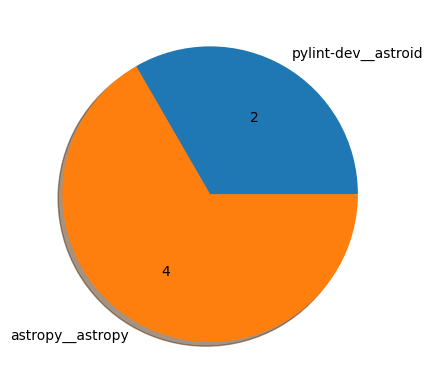

In [65]:
cntr = {}

for i in df['instance_id']:
    x = re.search("(.*)-\d+", i)
    if x:
        repo_name = x.group(1)
        if repo_name not in cntr:
            cntr[repo_name] = 1
        else:
            cntr[repo_name] += 1

vals = list(cntr.values())
keys = list(cntr.keys())
p, tx, autotexts = plt.pie([float(v) for v in vals], labels=[str(k) for k in keys], autopct='%1.1f%%', shadow=True)

for i, a in enumerate(autotexts):
    a.set_text("{}".format(vals[i]))

In [66]:
file_cnt = {"Repo state": [], "File count": [], "Line count": []}

for repo_state in os.listdir(repo_pth):
    fc = 0
    lc = 0
    for r, d, files in os.walk(os.path.join(repo_pth,repo_state)): 
        fc += len(files)
        for file in files:
            try:
                lc += sum(1 for _ in open(f'{r}/{file}'))
            except:
                pass
    file_cnt["Repo state"].append(repo_state)
    file_cnt["File count"].append(fc)
    file_cnt["Line count"].append(lc)

file_cnt_df = pd.DataFrame(file_cnt)
file_cnt_df

,Repo state,File count,Line count
0,repo__astropy__astropy-17048,1879,728356
1,repo__pylint-dev__astroid-2468,314,68094
2,repo__astropy__astropy-16898,1861,724959
3,repo__pylint-dev__astroid-2496,313,68244
4,repo__astropy__astropy-16812,1847,724601
5,repo__astropy__astropy-16830,1852,724683
